In [ ]:
import sys
sys.executable

'c:\\Users\\carlo\\miniforge3\\envs\\dtu02452\\python.exe'

In [ ]:
from pathlib import Path
import pandas as pd
import mne
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import pyedflib
from mne.time_frequency import psd_array_welch


In [ ]:
data = Path(r"C:\Users\carlo\OneDrive - Universidade de Lisboa\Documents\GitHub\heart-lung-brain-coupling-for-RBD\Data\cap-sleep-database-1.0.0\rbd1.edf")
raw = mne.io.read_raw_edf(data, preload=False, verbose=False)
raw.load_data()

raw.info["sfreq"], len(raw.ch_names), raw.ch_names[:10]

Reading 0 ... 15498751  =      0.000 ... 30270.998 secs...


C:\Users\carlo\AppData\Local\Temp\ipykernel_10488\1449954356.py:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(data, preload=False, verbose=False)
C:\Users\carlo\AppData\Local\Temp\ipykernel_10488\1449954356.py:2: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(data, preload=False, verbose=False)
C:\Users\carlo\AppData\Local\Temp\ipykernel_10488\1449954356.py:2: RuntimeWarning: Highpass cutoff frequency 10.0 is greater than lowpass cutoff frequency 3.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(data, preload=False, verbose=False)


(512.0,
 15,
 ['ROC-LOC',
  'Fp2-F4',
  'F4-C4',
  'C4-P4',
  'P4-O2',
  'C4-A1',
  'EMG1-EMG2',
  'ECG1-ECG2',
  'DX1-DX2',
  'SX1-SX2'])

In [ ]:
eeg_chs  = ["Fp2-F4", "F4-C4", "C4-P4", "P4-O2", "C4-A1", "F8-T4", "F7-T3"]
ecg_chs  = ["ECG1-ECG2"]
resp_chs = ["TORACE", "ADDOME"]
eog_chs  = ["ROC-LOC"]

In [ ]:
raw.get_channel_types(picks=eeg_chs[:5] + ecg_chs + resp_chs)
print("Sampling frequency:", raw.info["sfreq"])
print("Duration (s):", raw.n_times / raw.info["sfreq"])

Sampling frequency: 512.0
Duration (s): 30271.0


In [ ]:
txt_path = r"C:\Users\carlo\OneDrive - Universidade de Lisboa\Documents\GitHub\heart-lung-brain-coupling-for-RBD\Data\cap-sleep-database-1.0.0\rbd1.txt"
df = pd.read_csv(txt_path, sep='\t', header=None, names=["Sleep Stage", "Position", "Time [hh:mm:ss]", "Event", "Duration[s]", "Location"], skiprows=22)
df.head()

,Sleep Stage,Position,Time [hh:mm:ss],Event,Duration[s],Location
0,W,Unknown Position,23:07:19,SLEEP-S0,30,ROC-LOC
1,W,Unknown Position,23:07:49,SLEEP-S0,30,ROC-LOC
2,W,Unknown Position,23:08:19,SLEEP-S0,30,ROC-LOC
3,W,Unknown Position,23:08:49,SLEEP-S0,30,ROC-LOC
4,W,Unknown Position,23:09:19,SLEEP-S0,30,ROC-LOC


In [ ]:
epoch_len = 30.0
df["onset_s"] = np.arange(len(df)) * epoch_len

# WAKE EPOCHS
wake = df[df["Sleep Stage"] == "W"]
print(len(wake), wake.head())
wake = df[df["Sleep Stage"] == "W"].copy()
wake_epochs = list(zip(wake["onset_s"].to_numpy(), (wake["onset_s"] + wake["Duration[s]"]).to_numpy()))
t0_wake, t1_wake = wake_epochs[0]
dur_wake = float(t1_wake - t0_wake)
t0_wake, t1_wake, dur_wake

# REM EPOCHS
rem = df[df["Sleep Stage"] == "R"]
print(len(rem), rem.head())

rem = df[df["Sleep Stage"] == "R"].copy()
rem_epochs = list(zip(rem["onset_s"].to_numpy(), (rem["onset_s"] + rem["Duration[s]"]).to_numpy()))

t0_rem, t1_rem = rem_epochs[0]
dur_rem = float(t1_rem - t0_rem)
t0_rem, t1_rem, dur_rem

#S1 EPOCHS
S1 = df[df["Sleep Stage"] == "S1"]
print(len(S1), S1.head())

S1 = df[df["Sleep Stage"] == "S1"].copy()
S1_epochs = list(zip(S1["onset_s"].to_numpy(), (S1["onset_s"] + S1["Duration[s]"]).to_numpy()))

t0_S1, t1_S1 = S1_epochs[0]
dur_S1 = float(t1_S1 - t0_S1)
t0_S1, t1_S1, dur_S1

# S2 EPOCHS
S2 = df[df["Sleep Stage"] == "S2"]
print(len(S2), S2.head())

S2 = df[df["Sleep Stage"] == "S2"].copy()
S2_epochs = list(zip(S2["onset_s"].to_numpy(), (S2["onset_s"] + S2["Duration[s]"]).to_numpy()))
t0_S2, t1_S2 = S2_epochs[0]
dur_S2 = float(t1_S2 - t0_S2)
t0_S2, t1_S2, dur_S2

# S3 EPOCHS
S3 = df[df["Sleep Stage"] == "S3"]
print(len(S3), S3.head())

S3 = df[df["Sleep Stage"] == "S3"].copy()
S3_epochs = list(zip(S3["onset_s"].to_numpy(), (S3["onset_s"] + S3["Duration[s]"]).to_numpy()))
t0_S3, t1_S3 = S3_epochs[0]
dur_S3 = float(t1_S3 - t0_S3)
t0_S3, t1_S3, dur_S3

# S4 EPOCHS
S4 = df[df["Sleep Stage"] == "S4"]
print(len(S4), S4.head())
S4 = df[df["Sleep Stage"] == "S4"].copy()
S4_epochs = list(zip(S4["onset_s"].to_numpy(), (S4["onset_s"] + S4["Duration[s]"]).to_numpy()))
t0_S4, t1_S4 = S4_epochs[0]
dur_S4 = float(t1_S4 - t0_S4)
t0_S4, t1_S4, dur_S4

72   Sleep Stage          Position Time [hh:mm:ss]     Event  Duration[s]  \
0           W  Unknown Position        23:07:19  SLEEP-S0           30   
1           W  Unknown Position        23:07:49  SLEEP-S0           30   
2           W  Unknown Position        23:08:19  SLEEP-S0           30   
3           W  Unknown Position        23:08:49  SLEEP-S0           30   
4           W  Unknown Position        23:09:19  SLEEP-S0           30   

  Location  onset_s  
0  ROC-LOC      0.0  
1  ROC-LOC     30.0  
2  ROC-LOC     60.0  
3  ROC-LOC     90.0  
4  ROC-LOC    120.0  
126     Sleep Stage          Position Time [hh:mm:ss]      Event  Duration[s]  \
454           R  Unknown Position        01:44:49  SLEEP-REM           30   
455           R  Unknown Position        01:45:19  SLEEP-REM           30   
456           R  Unknown Position        01:45:49  SLEEP-REM           30   
457           R  Unknown Position        01:46:19  SLEEP-REM           30   
458           R  Unknown Positi

(np.float64(1890.0), np.float64(1920.0), 30.0)

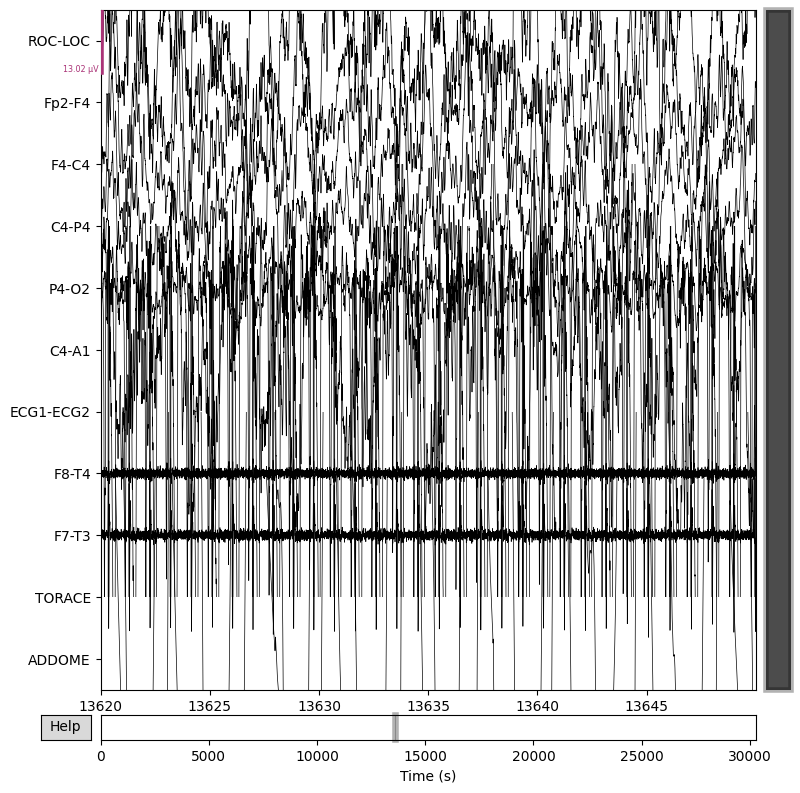

In [ ]:
t0, t1 = rem_epochs[0]
fig = raw.plot(
    start=float(t0),
    duration=float(t1 - t0),
    picks=eeg_chs + eog_chs + ecg_chs + resp_chs,
    n_channels=len(eeg_chs + eog_chs + ecg_chs + resp_chs),
    scalings="auto",
    title="First REM epoch (30s)",
    show=True
)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


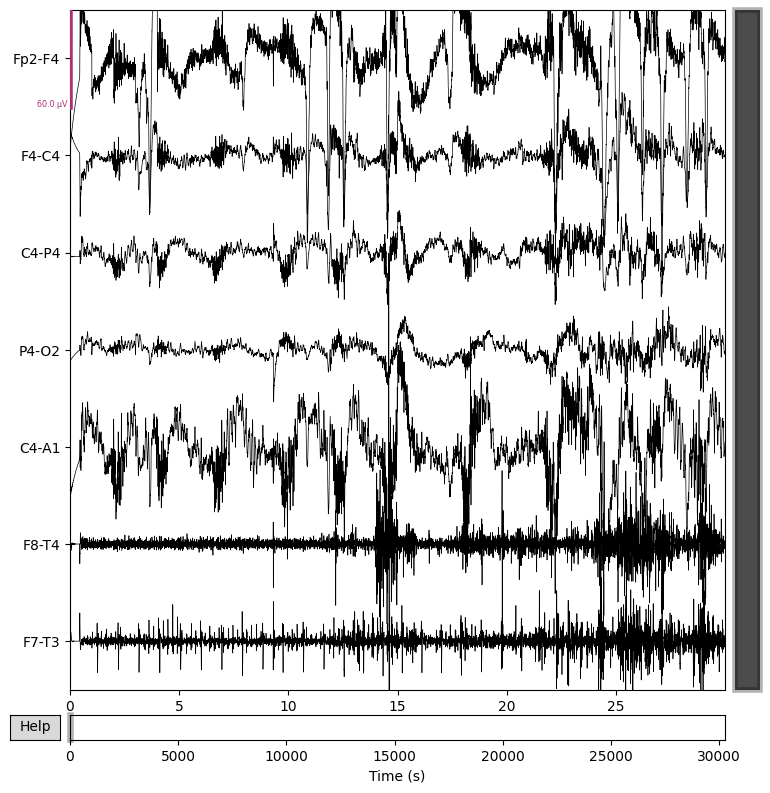

In [ ]:
# Raw EEG in Rem Sleep 
eeg = raw.copy().pick_channels(eeg_chs).load_data()
fig = eeg.plot(start=0, duration=dur, scalings=dict(eeg=30e-6), title="EEG — RAW", show=True)

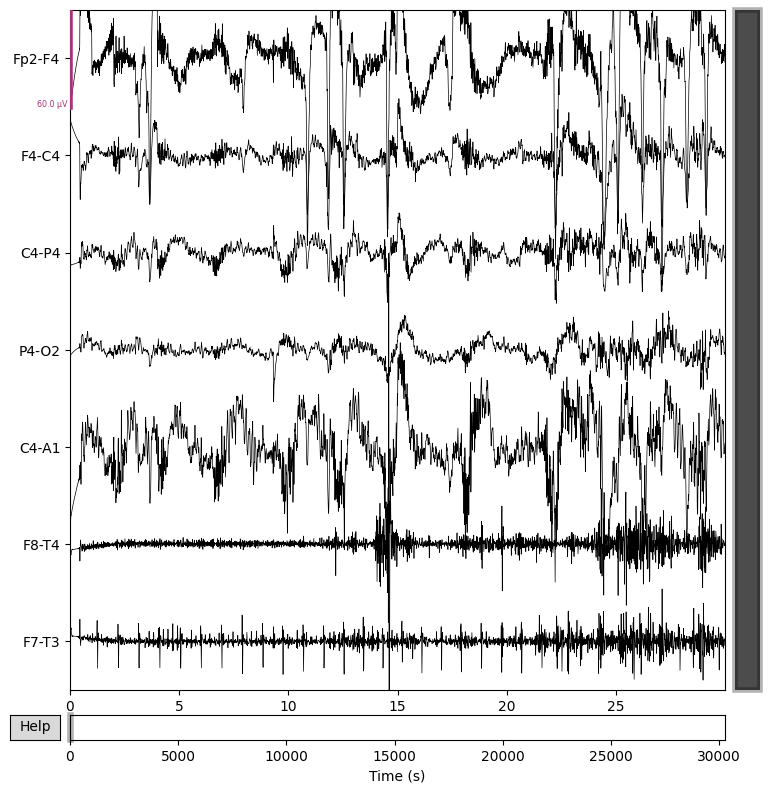

In [ ]:
# Filter EEG 
eeg_filtered = eeg.copy()
eeg_filtered.notch_filter([50,100], fir_design='firwin', verbose=False)
eeg_filtered.filter(l_freq=0.3, h_freq=35.0, verbose=False)
fig = eeg_filtered.plot(start=0, duration=dur, scalings=dict(eeg=30e-6), title="EEG — FILTERED", show=True)

In [ ]:
# psd reformulation
psd, freqs = psd_array_welch(
    X,
    sfreq=sf,
    fmin=0.5,
    fmax=40,
    n_per_seg=2048,   # or 4096
    n_fft=4096,       # gives 0.125 Hz resolution
    n_overlap=1024,
    verbose=False
)

RAW mean (µV): 0.01027338925047314
FILTERED mean (µV): -0.00019644637248169617
RAW std (µV): 13.275467350432264
FILTERED std (µV): 11.541736250111157
Effective window size : 4.000 (s)
Effective window size : 4.000 (s)
m_raw = [7.31559549e-11 4.48448152e-11 3.08225594e-11 2.47578663e-11
 2.55176740e-11 2.18910480e-11 1.13851831e-11 6.80870519e-12
 5.40132016e-12 4.64417838e-12 4.11194788e-12 3.74163577e-12
 3.20542755e-12 2.56930259e-12 2.21940776e-12 2.03171131e-12
 1.91460954e-12 1.79114876e-12 1.71732946e-12 1.69556301e-12
 1.76467534e-12 1.87839890e-12 2.12185377e-12 2.56203613e-12
 3.07853458e-12 3.28621571e-12 2.79725670e-12 2.19371119e-12
 1.79950708e-12 1.45401602e-12 1.24518168e-12 1.11962206e-12
 1.03192130e-12 9.92019204e-13 1.00521375e-12 1.02369863e-12
 1.05338709e-12 1.06845781e-12 1.07829691e-12 1.06930621e-12
 1.09764966e-12 1.07772221e-12 1.03588788e-12 1.01507854e-12
 1.02700912e-12 1.05887663e-12 1.05019064e-12 1.02397836e-12
 1.03767907e-12 1.07054825e-12 1.09138395e

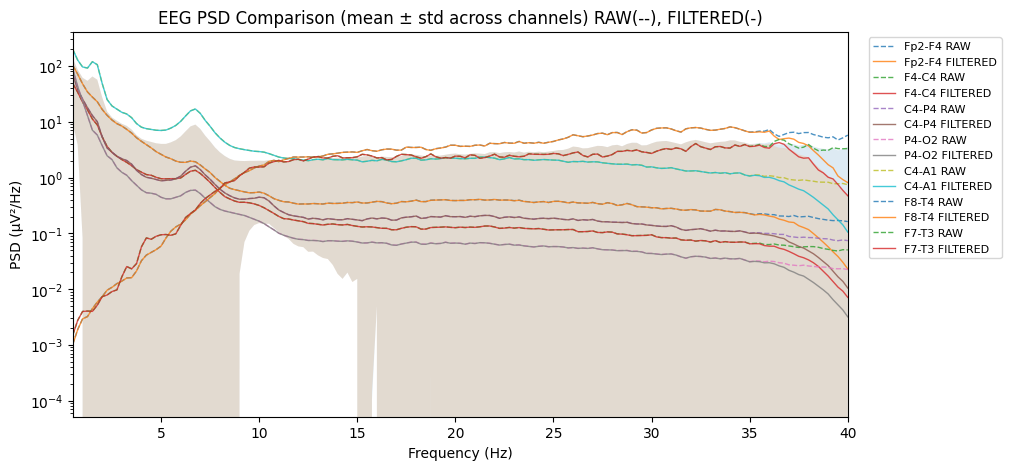

In [ ]:
X_raw = eeg.get_data()
X_flt = eeg_filtered.get_data()

print("RAW mean (µV):", np.mean(X_raw)*1e6)
print("FILTERED mean (µV):", np.mean(X_flt)*1e6)
print("RAW std (µV):", np.std(X_raw)*1e6)
print("FILTERED std (µV):", np.std(X_flt)*1e6)

#PSD Comparison
psd_raw, freqs = psd_array_welch(X_raw, sfreq=eeg.info['sfreq'], fmin=0.5, fmax=40.0, n_fft=2048, n_overlap=1024, n_per_seg=2048)
psd_flt, _ = psd_array_welch(X_flt, sfreq=eeg_filtered.info['sfreq'], fmin=0.5, fmax=40.0, n_fft=2048, n_overlap=1024, n_per_seg=2048)

# average across channels
m_raw = psd_raw.mean(axis=0)
m_flt = psd_flt.mean(axis=0)
print("m_raw =", m_raw)
print("m_flt =", m_flt)

# variability across channels (optional)
s_raw = psd_raw.std(axis=0)
s_flt = psd_flt.std(axis=0)
print("s_raw =", s_raw)
print("s_flt =", s_flt)

plt.figure(figsize=(10,5))
for i, ch in enumerate(eeg.ch_names):
    plt.semilogy(freqs, psd_raw[i]*1e12, linestyle="--", linewidth=1, alpha=0.8, label=f"{ch} RAW")
    plt.semilogy(freqs, psd_flt[i]*1e12, linestyle="-",  linewidth=1, alpha=0.8, label=f"{ch} FILTERED")
plt.fill_between(freqs, (m_raw-s_raw)*1e12, (m_raw+s_raw)*1e12, alpha=0.15)
plt.fill_between(freqs, (m_flt-s_flt)*1e12, (m_flt+s_flt)*1e12, alpha=0.15)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (µV²/Hz)")
plt.title("EEG PSD Comparison (mean ± std across channels) RAW(--), FILTERED(-)")
plt.xlim(0.5, 40)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=1)
plt.xlim(0.5, 40)
plt.show()


In [ ]:
sf = raw.info["sfreq"]

bands = { "delta": (0.5, 4), "theta": (4, 8), "alpha": (8, 12), "beta":  (12, 30), "gamma": (30, 40) }
stage_epochs = {"W": wake_epochs, "R": rem_epochs, "S1": S1_epochs, "S2": S2_epochs, "S3": S3_epochs, "S4": S4_epochs,}

def eeg_bandpower_per_epoch(eeg_filtered, epochs, sf, bands, eeg_chs):
    rows = []
    for i, (t0, t1) in enumerate(epochs):
        a, b = int(t0*sf), int(t1*sf)
        X = eeg_filtered.get_data(start=a, stop=b)  # (n_ch, n_times)
        psd, freqs = psd_array_welch(X, sfreq=sf, fmin=0.5, fmax=40, verbose=False)

        row = {"epoch": i, "start_s": float(t0)}
        for name, (f1, f2) in bands.items():
            idx = (freqs >= f1) & (freqs <= f2)
            bp_ch = np.trapezoid(psd[:, idx], freqs[idx], axis=1)  # per channel
            row[f"{name}_power"] = float(bp_ch.mean())       # mean across channels
        rows.append(row)

    return pd.DataFrame(rows)

dfs = []
for stage, epochs in stage_epochs.items():
    if len(epochs) == 0:
        continue
    tmp = eeg_bandpower_per_epoch(eeg_filtered, epochs, sf, bands, eeg_chs)
    tmp["stage"] = stage
    dfs.append(tmp)

eeg_stage_df = pd.concat(dfs, ignore_index=True)

# Print each sleep stage table
for stage in eeg_stage_df["stage"].unique():
    print(f"Bandpower table for stage {stage} (first 5 rows):")
    display(eeg_stage_df[eeg_stage_df["stage"] == stage].head(5))

# Compute mean bandpower per stage
band_cols = [f"{name}_power" for name in bands.keys()]

mean_table = (eeg_stage_df.groupby("stage")[band_cols].mean().sort_index())

# optional: also std, if you want variability
std_table = ( eeg_stage_df.groupby("stage")[band_cols].std().sort_index())

# Full per-epoch table (first rows)
print("Per-epoch bandpower table (first 10 rows):")
display(eeg_stage_df.head(10))

print("\nMean bandpower per stage:")
display(mean_table)

print("\nStd bandpower per stage:")
display(std_table)


Bandpower table for stage W (first 5 rows):


,epoch,start_s,delta_power,theta_power,alpha_power,beta_power,gamma_power,stage
0,0,0.0,2.840288e-11,1.611434e-11,5.358305e-12,1.224146e-11,3.595985e-12,W
1,1,30.0,3.748663e-11,2.421389e-11,5.958235e-12,1.482490e-11,4.495642e-12,W
2,2,60.0,3.913380e-11,2.259215e-11,3.940784e-12,5.925194e-12,1.509448e-12,W
3,3,90.0,3.004678e-11,1.699776e-11,9.539503e-12,3.980530e-11,1.945767e-11,W
4,4,120.0,2.330283e-11,1.150016e-11,6.627556e-12,3.180037e-11,1.596348e-11,W


Bandpower table for stage R (first 5 rows):


,epoch,start_s,delta_power,theta_power,alpha_power,beta_power,gamma_power,stage
72,0,13620.0,9.586012e-12,4.582213e-12,1.956616e-12,1.655137e-12,1.142447e-13,R
73,1,13650.0,8.947330e-12,5.670189e-12,2.129930e-12,1.757714e-12,1.322641e-13,R
74,2,13680.0,1.301774e-11,4.438147e-12,1.588217e-12,1.981991e-12,2.110289e-13,R
75,3,13710.0,9.914446e-12,5.580956e-12,1.879651e-12,1.472786e-12,9.933909e-14,R
76,4,13740.0,7.973933e-12,4.429364e-12,2.040253e-12,1.821049e-12,1.258531e-13,R


Bandpower table for stage S1 (first 5 rows):


,epoch,start_s,delta_power,theta_power,alpha_power,beta_power,gamma_power,stage
198,0,690.0,1.172043e-11,1.186355e-11,3.726889e-12,9.277189e-12,2.718521e-12,S1
199,1,720.0,1.688977e-11,1.540468e-11,4.561897e-12,9.381814e-12,2.650512e-12,S1
200,2,750.0,1.664861e-11,1.470284e-11,5.621473e-12,1.365586e-11,3.869587e-12,S1
201,3,780.0,9.448126e-12,1.438785e-11,5.615878e-12,9.521255e-12,2.402297e-12,S1
202,4,1170.0,1.304907e-10,8.547651e-11,4.742171e-11,1.766870e-10,5.968681e-11,S1


Bandpower table for stage S2 (first 5 rows):


,epoch,start_s,delta_power,theta_power,alpha_power,beta_power,gamma_power,stage
250,0,810.0,9.239738e-11,5.644529e-11,2.570230e-11,9.776773e-11,4.158339e-11,S2
251,1,840.0,4.205152e-11,1.748945e-11,1.177838e-11,9.584369e-11,2.859881e-11,S2
252,2,870.0,7.672330e-11,3.103291e-11,1.566466e-11,1.077162e-10,6.291290e-11,S2
253,3,900.0,1.087295e-10,5.487667e-11,5.549321e-11,4.681069e-10,4.005667e-10,S2
254,4,930.0,1.974207e-10,9.066109e-11,1.082239e-10,1.264277e-09,1.066831e-09,S2


Bandpower table for stage S3 (first 5 rows):


,epoch,start_s,delta_power,theta_power,alpha_power,beta_power,gamma_power,stage
722,0,1560.0,1.632097e-11,1.395926e-11,4.239092e-12,9.438003e-12,4.460735e-12,S3
723,1,1590.0,1.515931e-11,1.498583e-11,4.307543e-12,6.002426e-12,2.013505e-12,S3
724,2,1620.0,1.913648e-11,1.744247e-11,4.854145e-12,6.677169e-12,2.417179e-12,S3
725,3,1650.0,1.575637e-11,1.180132e-11,4.264305e-12,6.209444e-12,1.934385e-12,S3
726,4,1680.0,2.459936e-11,1.984534e-11,4.809826e-12,8.272758e-12,3.334619e-12,S3


Bandpower table for stage S4 (first 5 rows):


,epoch,start_s,delta_power,theta_power,alpha_power,beta_power,gamma_power,stage
783,0,1890.0,1.123152e-11,1.401864e-11,4.430974e-12,1.386040e-11,5.741396e-12,S4
784,1,1920.0,8.536268e-12,1.112227e-11,4.192725e-12,1.096222e-11,4.127198e-12,S4
785,2,1950.0,1.669912e-11,1.337188e-11,4.608030e-12,1.442864e-11,7.412162e-12,S4
786,3,1980.0,1.687228e-11,1.221077e-11,4.242510e-12,1.355910e-11,5.999926e-12,S4
787,4,2010.0,2.306410e-11,1.942680e-11,8.342838e-12,3.867309e-11,1.803023e-11,S4


Per-epoch bandpower table (first 10 rows):


,epoch,start_s,delta_power,theta_power,alpha_power,beta_power,gamma_power,stage
0,0,0.0,2.840288e-11,1.611434e-11,5.358305e-12,1.224146e-11,3.595985e-12,W
1,1,30.0,3.748663e-11,2.421389e-11,5.958235e-12,1.482490e-11,4.495642e-12,W
2,2,60.0,3.913380e-11,2.259215e-11,3.940784e-12,5.925194e-12,1.509448e-12,W
3,3,90.0,3.004678e-11,1.699776e-11,9.539503e-12,3.980530e-11,1.945767e-11,W
4,4,120.0,2.330283e-11,1.150016e-11,6.627556e-12,3.180037e-11,1.596348e-11,W
5,5,150.0,5.380363e-11,4.181366e-11,6.211737e-11,4.587418e-10,2.715281e-10,W
6,6,180.0,3.001260e-11,2.463351e-11,5.554442e-11,6.807881e-10,6.458220e-10,W
7,7,210.0,3.095831e-11,2.495300e-11,3.338282e-11,3.861694e-10,3.025022e-10,W
8,8,240.0,5.044478e-11,3.608460e-11,2.043037e-11,1.224986e-10,5.750172e-11,W
9,9,270.0,7.142748e-11,4.570534e-11,2.361971e-11,2.397507e-10,2.252851e-10,W



Mean bandpower per stage:


,delta_power,theta_power,alpha_power,beta_power,gamma_power
stage,,,,,
R,7.645462e-12,4.460456e-12,2.495242e-12,8.929146e-12,3.629755e-12
S1,1.107508e-11,8.954958e-12,4.100059e-12,1.378692e-11,5.353048e-12
S2,1.134592e-11,7.675381e-12,3.686581e-12,1.568760e-11,8.226592e-12
S3,8.199890e-12,1.029272e-11,6.915994e-12,4.671379e-11,3.073991e-11
S4,2.261184e-11,1.676154e-11,8.757721e-12,5.560666e-11,3.687560e-11
W,3.330693e-11,2.003372e-11,9.770074e-12,5.408929e-11,3.278918e-11



Std bandpower per stage:


,delta_power,theta_power,alpha_power,beta_power,gamma_power
stage,,,,,
R,3.666481e-11,6.550573e-12,6.260994e-12,3.870585e-11,1.855339e-11
S1,2.178055e-11,1.314772e-11,7.265258e-12,3.290314e-11,1.278973e-11
S2,2.572731e-11,1.377394e-11,7.984311e-12,7.265717e-11,5.697804e-11
S3,7.768159e-12,4.924546e-12,6.469192e-12,9.401845e-11,7.769955e-11
S4,3.758747e-11,1.704932e-11,8.673729e-12,8.354511e-11,8.507468e-11
W,5.598857e-11,2.898455e-11,1.383487e-11,1.132114e-10,9.274879e-11
